This notebook calculates reconstruction bias and RMSE for the different sampling experiments (reconstructions are compared to the "model truth" of the Large Ensemble Testbed). We show global maps and hovmoller diagrams.

This notebook was created by Thea Hatlen Heimdal, in collaboration with Julius Busecke and Val Bennington. 

In [ ]:
import numpy as np
import pandas as pd
import xarray as xr
import pickle
import matplotlib.pyplot as plt 
import seaborn as sns
%run _Val_Mapping.ipynb # supporting file with functions

In [2]:
# Loading references - pickle files members of the LET

path_LET = "/local/data/artemis/workspace/theimdal/saildrone/LET_pickle_files/members_LET_dict.pickle"

with open(path_LET,'rb') as handle:
    mems_dict = pickle.load(handle)

### Bring in reconstructions

#### SOCAT only

In [3]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/SOCAT/models/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_full_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_SOCAT_only = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### Saildrone 5 years

In [4]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_5/models/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_5 = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### Saildrone 5 years x5 winter months

In [5]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_5/models/saildrone5_5x_winter/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_5_5x_winter = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### Saildrone 10 years

In [6]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_10_new/models/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_10 = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### Saildrone 10 shifted

In [7]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_10_new/models/saildrone10_shifted/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_10_shifted = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### Saildrone multiple (12)

In [8]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_10_new/models/saildrone10_mult_12/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_10_mult_12 = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### Saildrone multiple (12) winter

In [9]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_10_new/models/saildrone10_mult_12_winter/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_10_mult_12_winter = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### Saildrone zigzag 10 years

In [10]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_zigzag/models/10_years/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_zigzag_10 = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### Saildrone zigzag 10 years winter

In [11]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_zigzag/models/10_years_winter/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_zigzag_10_winter = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### Saildrone zigzag 5 years

In [12]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_zigzag/models/5_years_x12/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_zigzag_5_x12 = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### Saildrone zigzag 5 years winter 

In [13]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_zigzag/models/5_years_x12_winter/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_zigzag_5_x12_winter = xr.concat(datasets_ens, dim='ensemble', join='override') 

### RMSE

### 1982-2016

In [14]:
#Calculate mean RMSE (globally, 1982-2016) for the different experiments
RMSE_socat_map = xr.ufuncs.sqrt(((ds_SOCAT_only.diff('status'))**2).sel(time=slice("1982-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))
RMSE_sail5_map = xr.ufuncs.sqrt(((ds_Saildrone_5.diff('status'))**2).sel(time=slice("1982-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))
RMSE_sail5_winter_map = xr.ufuncs.sqrt(((ds_Saildrone_5_5x_winter.diff('status'))**2).sel(time=slice("1982-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))
RMSE_sail10_map = xr.ufuncs.sqrt(((ds_Saildrone_10.diff('status'))**2).sel(time=slice("1982-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))
RMSE_sail10_shifted_map = xr.ufuncs.sqrt(((ds_Saildrone_10_shifted.diff('status'))**2).sel(time=slice("1982-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))
RMSE_sail10_x12_map = xr.ufuncs.sqrt(((ds_Saildrone_10_mult_12.diff('status'))**2).sel(time=slice("1982-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))
RMSE_sail10_x12_map_winter = xr.ufuncs.sqrt(((ds_Saildrone_10_mult_12_winter.diff('status'))**2).sel(time=slice("1982-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))
RMSE_sail_zigzag_10_map = xr.ufuncs.sqrt(((ds_Saildrone_zigzag_10.diff('status'))**2).sel(time=slice("1982-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))
RMSE_sail_zigzag_10_map_w = xr.ufuncs.sqrt(((ds_Saildrone_zigzag_10_winter.diff('status'))**2).sel(time=slice("1982-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))
RMSE_sail_zigzag_5_map = xr.ufuncs.sqrt(((ds_Saildrone_zigzag_5_x12.diff('status'))**2).sel(time=slice("1982-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))
RMSE_sail_zigzag_5_map_w = xr.ufuncs.sqrt(((ds_Saildrone_zigzag_5_x12_winter.diff('status'))**2).sel(time=slice("1982-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))

In [15]:
#change in RMSE from the SOCAT-baseline
map_new_RMSE_sail5 = RMSE_sail5_map-RMSE_socat_map
map_new_RMSE_sail5_winter = RMSE_sail5_winter_map-RMSE_socat_map
map_new_RMSE_sail10 = RMSE_sail10_map-RMSE_socat_map
map_new_RMSE_sail10_shifted = RMSE_sail10_shifted_map-RMSE_socat_map
map_new_RMSE_sail10_12x = RMSE_sail10_x12_map-RMSE_socat_map
map_new_RMSE_sail10_12x_winter = RMSE_sail10_x12_map_winter-RMSE_socat_map
map_new_RMSE_sail_zigzag_10 = RMSE_sail_zigzag_10_map-RMSE_socat_map
map_new_RMSE_sail_zigzag_10_w = RMSE_sail_zigzag_10_map_w-RMSE_socat_map
map_new_RMSE_sail_zigzag_5 = RMSE_sail_zigzag_5_map-RMSE_socat_map
map_new_RMSE_sail_zigzag_5_w = RMSE_sail_zigzag_5_map_w-RMSE_socat_map

### 2006-2016/2012-2016

In [20]:
#Calculate mean RMSE (globally, 2006/2012-2016) for the different experiments
RMSE_socat_0616_map = xr.ufuncs.sqrt(((ds_SOCAT_only.diff('status'))**2).sel(time=slice("2006-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))
RMSE_socat_1216_map = xr.ufuncs.sqrt(((ds_SOCAT_only.diff('status'))**2).sel(time=slice("2012-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))
RMSE_sail5_1216_map = xr.ufuncs.sqrt(((ds_Saildrone_5.diff('status'))**2).sel(time=slice("2012-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))
RMSE_sail5_winter_1216_map = xr.ufuncs.sqrt(((ds_Saildrone_5_5x_winter.diff('status'))**2).sel(time=slice("2012-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))
RMSE_sail10_0616_map = xr.ufuncs.sqrt(((ds_Saildrone_10.diff('status'))**2).sel(time=slice("2006-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))
RMSE_sail10_shifted_0616_map = xr.ufuncs.sqrt(((ds_Saildrone_10_shifted.diff('status'))**2).sel(time=slice("2006-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))
RMSE_sail10_x12_0616_map = xr.ufuncs.sqrt(((ds_Saildrone_10_mult_12.diff('status'))**2).sel(time=slice("2006-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))
RMSE_sail10_x12_winter_0616_map = xr.ufuncs.sqrt(((ds_Saildrone_10_mult_12_winter.diff('status'))**2).sel(time=slice("2006-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))
RMSE_sail_zigzag_10_0616_map = xr.ufuncs.sqrt(((ds_Saildrone_zigzag_10.diff('status'))**2).sel(time=slice("2006-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))
RMSE_sail_zigzag_10_winter_0616_map = xr.ufuncs.sqrt(((ds_Saildrone_zigzag_10_winter.diff('status'))**2).sel(time=slice("2006-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))
RMSE_sail_zigzag_5_1216_map = xr.ufuncs.sqrt(((ds_Saildrone_zigzag_5_x12.diff('status'))**2).sel(time=slice("2012-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))
RMSE_sail_zigzag_5_winter_1216_map = xr.ufuncs.sqrt(((ds_Saildrone_zigzag_5_x12_winter.diff('status'))**2).sel(time=slice("2012-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))

In [21]:
#change in RMSE from the SOCAT-baseline
map_new_RMSE_sail5_1216 = RMSE_sail5_1216_map-RMSE_socat_1216_map
map_new_RMSE_sail5_winter_1216 = RMSE_sail5_winter_1216_map-RMSE_socat_1216_map
map_new_RMSE_sail10_0616 = RMSE_sail10_0616_map-RMSE_socat_0616_map
map_new_RMSE_sail10_shifted_0616 = RMSE_sail10_shifted_0616_map-RMSE_socat_0616_map
map_new_RMSE_sail10_12x_0616 = RMSE_sail10_x12_0616_map-RMSE_socat_0616_map
map_new_RMSE_sail10_12x_winter_0616 =RMSE_sail10_x12_winter_0616_map-RMSE_socat_0616_map
map_new_RMSE_sail_zigzag_10_0616 =RMSE_sail_zigzag_10_0616_map-RMSE_socat_0616_map
map_new_RMSE_sail_zigzag_10_w_0616 =RMSE_sail_zigzag_10_winter_0616_map-RMSE_socat_0616_map
map_new_RMSE_sail_zigzag_5_1216 =RMSE_sail_zigzag_5_1216_map-RMSE_socat_1216_map
map_new_RMSE_sail_zigzag_5_w_1216 =RMSE_sail_zigzag_5_winter_1216_map-RMSE_socat_1216_map

### 1982-2016

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
<ipython-input-40-5d7619ade4de>:14: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(RMSE_socat_map, axis=0)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


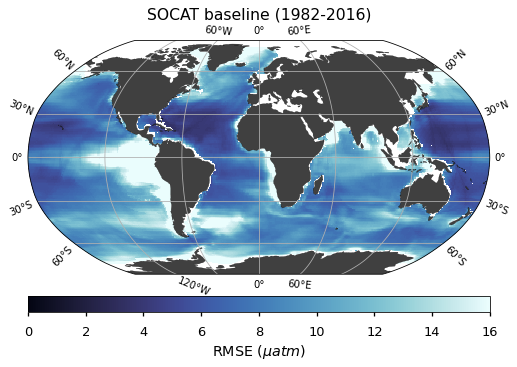

In [40]:
vrange = [0, 16, 17]
fig_shape = (1,1)
cmap = cm.cm.ice
lab = f'RMSE ($\mu atm$)'
   
      
with plt.style.context('seaborn-talk'):
    fig = plt.figure(figsize=(15,5))

    ### Mask
    dia = SpatialMap2(nrows_ncols=fig_shape, fig=fig, cbar_location='bottom', cbar_orientation='horizontal')
    
    
    map_sel = np.nanmean(RMSE_socat_map, axis=0)
    sub = dia.add_plot(lat = RMSE_socat_map['ylat'], 
                           lon = RMSE_socat_map['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=0)
    #print(np.nanmean(np.abs(map_sel.T)))
    dia.set_title("SOCAT baseline (1982-2016)", 0, loc="center")
    
    #dia.grid[0].plot([-180, 180], [35, 35], 'k--', linewidth=2, transform=ccrs.PlateCarree())
    #dia.grid[0].plot([-180, 180], [-35, -35], 'k--',  linewidth=2, transform=ccrs.PlateCarree())
    
    col = dia.add_colorbar(sub)
    dia.set_cbar_xlabel(col, lab)
    dia.grid[0].gridlines(draw_labels=True)

#fig.savefig("/home/theimdal/RMSE_baseline_map.jpg",dpi=300, bbox_inches="tight")

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
<ipython-input-18-3fa0f779c3f4>:15: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(map_new_RMSE_sail5, axis=0)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
<ipython-input-18-3fa0f779c3f4>:26: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(map_new_RMSE_sail10, axis=0)
<ipython-input-18-3fa0f779c3f4>:36: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(map_new_RM

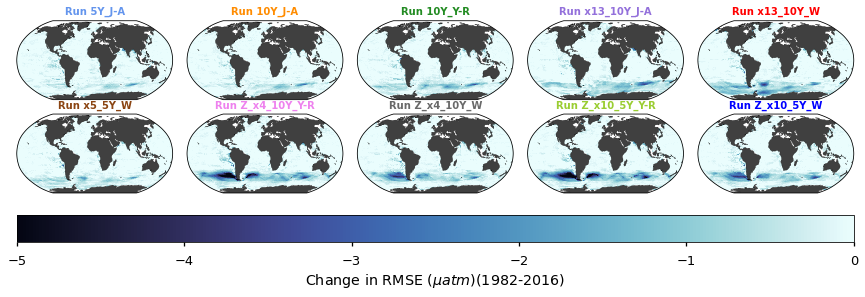

In [18]:
vrange = [-5, 0, 1]
#fig_shape = (1,4)
fig_shape = (2,5)
cmap = cm.cm.ice
lab = f'Change in RMSE ($\mu atm$)(1982-2016)'
   
      
with plt.style.context('seaborn-talk'):
    fig = plt.figure(figsize=(15,5))

    ### Mask
    dia = SpatialMap2(nrows_ncols=fig_shape, fig=fig, cbar_location='bottom', cbar_orientation='horizontal')
    
    
    map_sel = np.nanmean(map_new_RMSE_sail5, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail5['ylat'], 
                           lon = map_new_RMSE_sail5['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=0)
    dia.set_title("Run 5Y_J-A", 0, loc="center", fontweight='bold', color='cornflowerblue', fontsize=10)
    
    
    map_sel = np.nanmean(map_new_RMSE_sail10, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail10['ylat'], 
                           lon = map_new_RMSE_sail10['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=1)
    dia.set_title("Run 10Y_J-A", 1, loc="center", fontweight='bold', color='darkorange', fontsize=10)
    
    map_sel = np.nanmean(map_new_RMSE_sail10_shifted, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail10_shifted['ylat'], 
                           lon = map_new_RMSE_sail10_shifted['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=2)
    dia.set_title("Run 10Y_Y-R", 2, loc="center", fontweight='bold', color='forestgreen', fontsize=10)
    
    map_sel = np.nanmean(map_new_RMSE_sail10_12x, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail10_12x['ylat'], 
                           lon = map_new_RMSE_sail10_12x['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=3)
    dia.set_title("Run x13_10Y_J-A", 3, loc="center", fontweight='bold', color='mediumpurple', fontsize=10)
    
    
    map_sel = np.nanmean(map_new_RMSE_sail10_12x_winter, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail10_12x_winter['ylat'], 
                           lon = map_new_RMSE_sail10_12x_winter['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=4)
    dia.set_title("Run x13_10Y_W", 4, loc="center", fontweight='bold', color='red', fontsize=10)
    
    map_sel = np.nanmean(map_new_RMSE_sail5_winter, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail5_winter['ylat'], 
                           lon = map_new_RMSE_sail5_winter['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=5)
    dia.set_title("Run x5_5Y_W", 5, loc="center", fontweight='bold', color='saddlebrown', fontsize=10)
    
    
    map_sel = np.nanmean(map_new_RMSE_sail_zigzag_10, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail_zigzag_10['ylat'], 
                           lon = map_new_RMSE_sail_zigzag_10['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=6)
    dia.set_title("Run Z_x4_10Y_Y-R", 6, loc="center", fontweight='bold', color='violet', fontsize=10)
    
    map_sel = np.nanmean(map_new_RMSE_sail_zigzag_10_w, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail_zigzag_10_w['ylat'], 
                           lon = map_new_RMSE_sail_zigzag_10_w['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=7)
    dia.set_title("Run Z_x4_10Y_W", 7, loc="center", fontweight='bold', color='dimgray', fontsize=10)
    
    map_sel = np.nanmean(map_new_RMSE_sail_zigzag_5, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail_zigzag_5['ylat'], 
                           lon = map_new_RMSE_sail_zigzag_5['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=8)
    dia.set_title("Run Z_x10_5Y_Y-R", 8, loc="center", fontweight='bold', color='yellowgreen', fontsize=10)
    
    map_sel = np.nanmean(map_new_RMSE_sail_zigzag_5_w, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail_zigzag_5_w['ylat'], 
                           lon = map_new_RMSE_sail_zigzag_5_w['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=9)
    dia.set_title("Run Z_x10_5Y_W", 9, loc="center", fontweight='bold', color='blue', fontsize=10)
    
    
    col = dia.add_colorbar(sub)
    dia.set_cbar_xlabel(col, lab)
    #dia.grid[0].gridlines(draw_labels=True)

fig.savefig("/home/theimdal/RMSE_maps_1892-2016.jpg",dpi=300, bbox_inches="tight")

### 2006/2012-2016

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
<ipython-input-22-a01cd2e2c5aa>:15: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(map_new_RMSE_sail5_1216, axis=0)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
<ipython-input-22-a01cd2e2c5aa>:26: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(map_new_RMSE_sail10_0616, axis=0)
<ipython-input-22-a01cd2e2c5aa>:36: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(

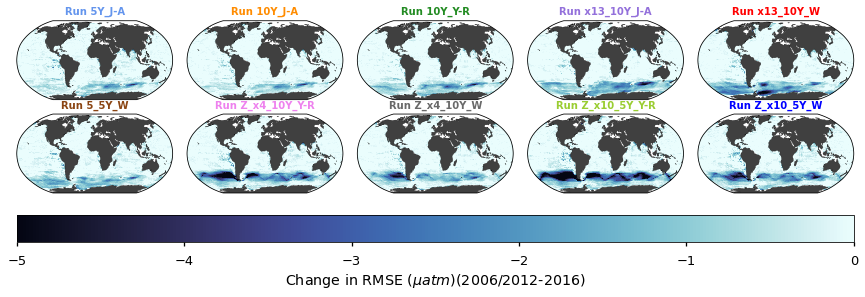

In [22]:
vrange = [-5, 0, 1]
#fig_shape = (1,4)
fig_shape = (2,5)
cmap = cm.cm.ice
lab = f'Change in RMSE ($\mu atm$)(2006/2012-2016)'
   
      
with plt.style.context('seaborn-talk'):
    fig = plt.figure(figsize=(15,5))

    ### Mask
    dia = SpatialMap2(nrows_ncols=fig_shape, fig=fig, cbar_location='bottom', cbar_orientation='horizontal')
    
    
    map_sel = np.nanmean(map_new_RMSE_sail5_1216, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail5_1216['ylat'], 
                           lon = map_new_RMSE_sail5_1216['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=0)
    dia.set_title("Run 5Y_J-A", 0, loc="center", fontweight='bold', color='cornflowerblue', fontsize=10)
    
    
    map_sel = np.nanmean(map_new_RMSE_sail10_0616, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail10_0616['ylat'], 
                           lon = map_new_RMSE_sail10_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=1)
    dia.set_title("Run 10Y_J-A", 1, loc="center", fontweight='bold', color='darkorange', fontsize=10)
    
    map_sel = np.nanmean(map_new_RMSE_sail10_shifted_0616, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail10_shifted_0616['ylat'], 
                           lon = map_new_RMSE_sail10_shifted_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=2)
    dia.set_title("Run 10Y_Y-R", 2, loc="center", fontweight='bold', color='forestgreen', fontsize=10)
    
    map_sel = np.nanmean(map_new_RMSE_sail10_12x_0616, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail10_12x_0616['ylat'], 
                           lon = map_new_RMSE_sail10_12x_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=3)
    dia.set_title("Run x13_10Y_J-A", 3, loc="center", fontweight='bold', color='mediumpurple', fontsize=10)
    
    
    map_sel = np.nanmean(map_new_RMSE_sail10_12x_winter_0616, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail10_12x_winter_0616['ylat'], 
                           lon = map_new_RMSE_sail10_12x_winter_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=4)
    dia.set_title("Run x13_10Y_W", 4, loc="center", fontweight='bold', color='red', fontsize=10)
    
    map_sel = np.nanmean(map_new_RMSE_sail5_winter_1216, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail5_winter_1216['ylat'], 
                           lon = map_new_RMSE_sail5_winter_1216['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=5)
    dia.set_title("Run 5_5Y_W", 5, loc="center", fontweight='bold', color='saddlebrown', fontsize=10)

    
    map_sel = np.nanmean(map_new_RMSE_sail_zigzag_10_0616, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail_zigzag_10_0616['ylat'], 
                           lon = map_new_RMSE_sail_zigzag_10_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=6)
    dia.set_title("Run Z_x4_10Y_Y-R", 6, loc="center", fontweight='bold', color='violet', fontsize=10)
    
    map_sel = np.nanmean(map_new_RMSE_sail_zigzag_10_w_0616, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail_zigzag_10_w_0616['ylat'], 
                           lon = map_new_RMSE_sail_zigzag_10_w_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=7)
    dia.set_title("Run Z_x4_10Y_W", 7, loc="center", fontweight='bold', color='dimgray', fontsize=10)
    
        
    map_sel = np.nanmean(map_new_RMSE_sail_zigzag_5_1216, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail_zigzag_5_1216['ylat'], 
                           lon = map_new_RMSE_sail_zigzag_5_1216['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=8)
    dia.set_title("Run Z_x10_5Y_Y-R", 8, loc="center", fontweight='bold', color='yellowgreen', fontsize=10)
    
    map_sel = np.nanmean(map_new_RMSE_sail_zigzag_5_w_1216, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail_zigzag_5_w_1216['ylat'], 
                           lon = map_new_RMSE_sail_zigzag_5_w_1216['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=9)
    dia.set_title("Run Z_x10_5Y_W", 9, loc="center", fontweight='bold', color='blue', fontsize=10)
 
    
    col = dia.add_colorbar(sub)
    dia.set_cbar_xlabel(col, lab)
    #dia.grid[0].gridlines(draw_labels=True)

fig.savefig("/home/theimdal/RMSE_maps_2006-2016.jpg",dpi=300, bbox_inches="tight")

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
<ipython-input-43-7af83ae7f724>:15: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(map_new_RMSE_sail5_winter, axis=0)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
<ipython-input-43-7af83ae7f724>:25: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(map_new_RMSE_sail_zigzag_10, axis=0)
<ipython-input-43-7af83ae7f724>:37: RuntimeWarning: Mean of empty slice
  map_sel = np.nan

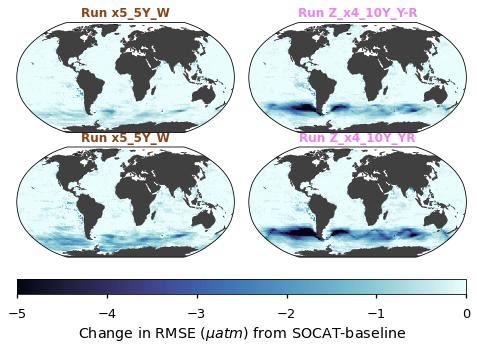

In [43]:
vrange = [-5, 0, 1]
#fig_shape = (1,4)
fig_shape = (2,2)
cmap = cm.cm.ice
lab = f'Change in RMSE ($\mu atm$) from SOCAT-baseline'
   
      
with plt.style.context('seaborn-talk'):
    fig = plt.figure(figsize=(15,5))

    ### Mask
    dia = SpatialMap2(nrows_ncols=fig_shape, fig=fig, cbar_location='bottom', cbar_orientation='horizontal')
    
    
    map_sel = np.nanmean(map_new_RMSE_sail5_winter, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail5_winter['ylat'], 
                           lon = map_new_RMSE_sail5_winter['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=0)
    dia.set_title("Run x5_5Y_W", 0, loc="center", fontweight='bold', color='saddlebrown', fontsize=12)
    
    map_sel = np.nanmean(map_new_RMSE_sail_zigzag_10, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail_zigzag_10['ylat'], 
                           lon = map_new_RMSE_sail_zigzag_10['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=1)
    dia.set_title("Run Z_x4_10Y_Y-R", 1, loc="center", fontweight='bold', color='violet', fontsize=12)

    
    
    map_sel = np.nanmean(map_new_RMSE_sail5_winter_1216, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail5_winter_1216['ylat'], 
                           lon = map_new_RMSE_sail5_winter_1216['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=2)
    dia.set_title("Run x5_5Y_W", 2, loc="center", fontweight='bold', color='saddlebrown', fontsize=12)
    
    map_sel = np.nanmean(map_new_RMSE_sail_zigzag_10_0616, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_sail_zigzag_10_0616['ylat'], 
                           lon = map_new_RMSE_sail_zigzag_10_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=3)
    dia.set_title("Run Z_x4_10Y_Y-R", 3, loc="center", fontweight='bold', color='violet', fontsize=12)
    
 
    
    col = dia.add_colorbar(sub)
    dia.set_cbar_xlabel(col, lab)
    #dia.grid[0].gridlines(draw_labels=True)

fig.savefig("/home/theimdal/RMSE_maps_main_text.jpg",dpi=300, bbox_inches="tight")

### Hovmoller diagrams

In [23]:
RMSE_SOCAT_timeline = xr.ufuncs.sqrt(((ds_SOCAT_only.diff('status'))**2).sel(time=slice('1982', '2016')).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon']))
RMSE_sail5_timeline = xr.ufuncs.sqrt(((ds_Saildrone_5.diff('status'))**2).sel(time=slice('1982', '2016')).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon']))
RMSE_sail5_winter_timeline = xr.ufuncs.sqrt(((ds_Saildrone_5_5x_winter.diff('status'))**2).sel(time=slice('1982', '2016')).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon']))
RMSE_sail10_timeline = xr.ufuncs.sqrt(((ds_Saildrone_10.diff('status'))**2).sel(time=slice('1982', '2016')).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon']))
RMSE_sail10_shifted_timeline = xr.ufuncs.sqrt(((ds_Saildrone_10_shifted.diff('status'))**2).sel(time=slice('1982', '2016')).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon']))
RMSE_sail10_12x_timeline = xr.ufuncs.sqrt(((ds_Saildrone_10_mult_12.diff('status'))**2).sel(time=slice('1982', '2016')).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon']))
RMSE_sail10_12x_winter_timeline = xr.ufuncs.sqrt(((ds_Saildrone_10_mult_12_winter.diff('status'))**2).sel(time=slice('1982', '2016')).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon']))
RMSE_sail_zigzag_10_timeline = xr.ufuncs.sqrt(((ds_Saildrone_zigzag_10.diff('status'))**2).sel(time=slice('1982', '2016')).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon']))
RMSE_sail_zigzag_10_winter_timeline = xr.ufuncs.sqrt(((ds_Saildrone_zigzag_10_winter.diff('status'))**2).sel(time=slice('1982', '2016')).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon']))
RMSE_sail_zigzag_5_timeline = xr.ufuncs.sqrt(((ds_Saildrone_zigzag_5_x12.diff('status'))**2).sel(time=slice('1982', '2016')).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon']))
RMSE_sail_zigzag_5_winter_timeline = xr.ufuncs.sqrt(((ds_Saildrone_zigzag_5_x12_winter.diff('status'))**2).sel(time=slice('1982', '2016')).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon']))

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.p

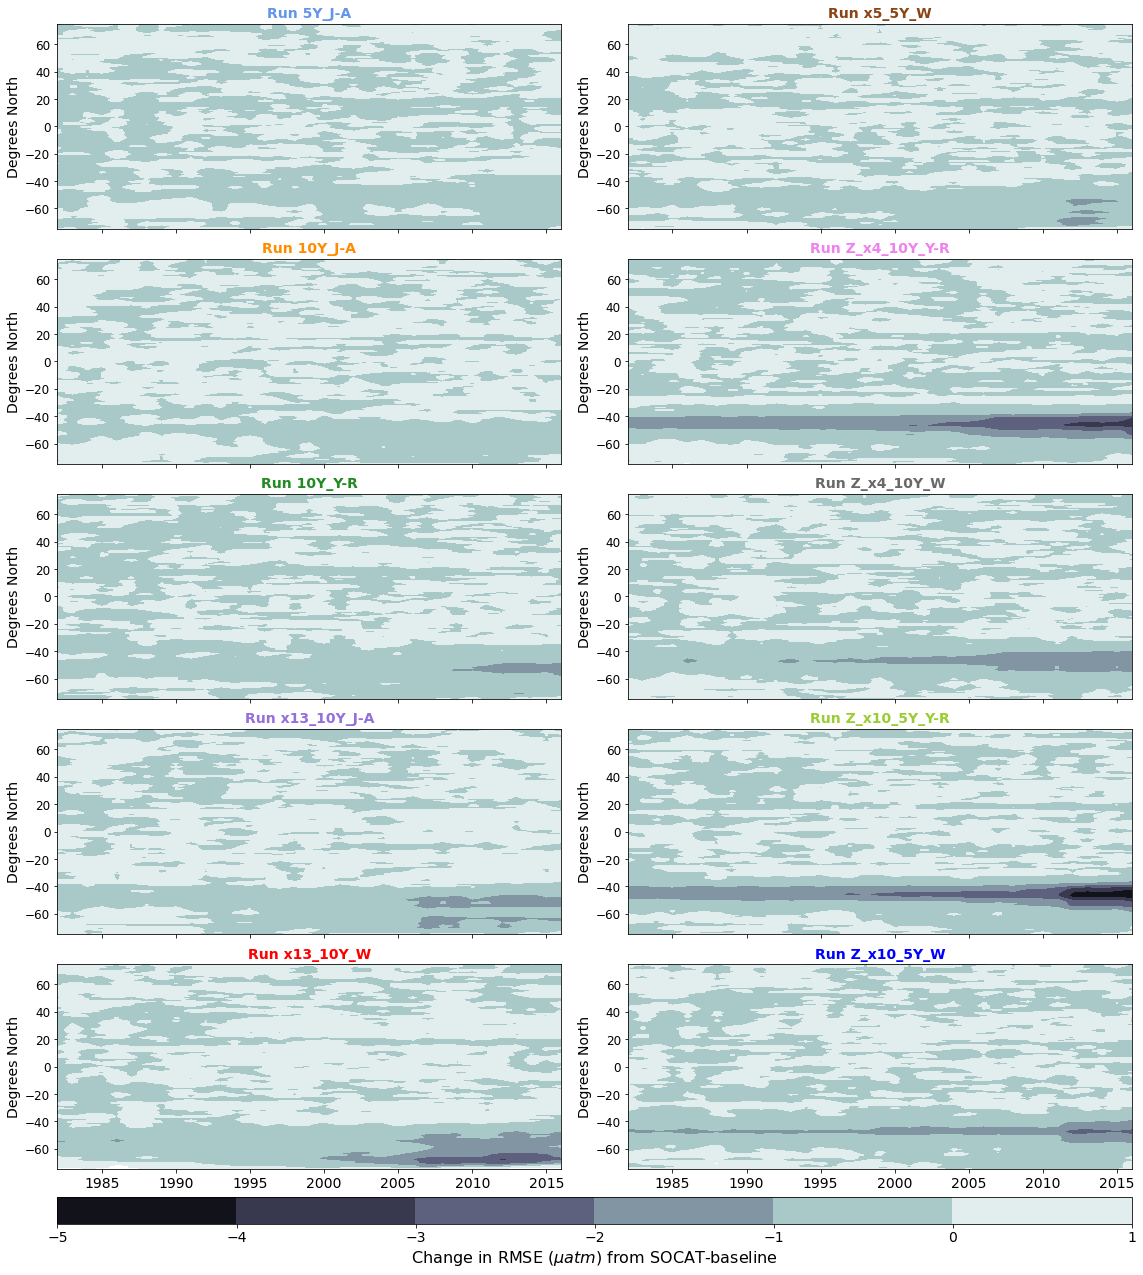

In [24]:
fig, ax = plt.subplots(5,2, figsize=(16,20), sharex=True)

map_plot = ax[0,0].contourf(range(1982,2017),RMSE_SOCAT_timeline.ylat,(RMSE_sail5_timeline-RMSE_SOCAT_timeline).transpose(),levels=np.linspace(-5,1,7),cmap='bone') #levels, cmap and extend are optional
ax[0,0].set_ylabel("Degrees North", fontsize=14)
ax[0,0].set_ylim(-75,75)
ax[0,0].yaxis.set_tick_params(labelsize=12)
ax[0,0].set_title('Run 5Y_J-A', fontsize=14, fontweight="bold", color="cornflowerblue")

ax[1,0].contourf(range(1982,2017),RMSE_SOCAT_timeline.ylat,(RMSE_sail10_timeline-RMSE_SOCAT_timeline).transpose(),levels=np.linspace(-5,1,7),cmap='bone')
ax[1,0].set_ylabel("Degrees North", fontsize=14)
ax[1,0].set_ylim(-75,75)
ax[1,0].yaxis.set_tick_params(labelsize=12)
ax[1,0].set_title('Run 10Y_J-A', fontsize=14, fontweight="bold", color="darkorange")

ax[2,0].contourf(range(1982,2017),RMSE_SOCAT_timeline.ylat,(RMSE_sail10_shifted_timeline-RMSE_SOCAT_timeline).transpose(),levels=np.linspace(-5,1,7),cmap='bone')
ax[2,0].set_ylabel("Degrees North", fontsize=14)
ax[2,0].set_ylim(-75,75)
ax[2,0].yaxis.set_tick_params(labelsize=12)
ax[2,0].set_title('Run 10Y_Y-R', fontsize=14, fontweight="bold", color="forestgreen")

ax[3,0].contourf(range(1982,2017),RMSE_SOCAT_timeline.ylat,(RMSE_sail10_12x_timeline -RMSE_SOCAT_timeline).transpose(),levels=np.linspace(-5,1,7),cmap='bone')
ax[3,0].set_ylabel("Degrees North", fontsize=14)
ax[3,0].set_ylim(-75,75)
ax[3,0].yaxis.set_tick_params(labelsize=12)
ax[3,0].set_title('Run x13_10Y_J-A', fontsize=14, fontweight="bold", color="mediumpurple")

ax[4,0].contourf(range(1982,2017),RMSE_SOCAT_timeline.ylat,(RMSE_sail10_12x_winter_timeline-RMSE_SOCAT_timeline).transpose(),levels=np.linspace(-5,1,7),cmap='bone')
ax[4,0].set_ylabel("Degrees North", fontsize=14)
ax[4,0].set_ylim(-75,75)
ax[4,0].yaxis.set_tick_params(labelsize=12)
ax[4,0].xaxis.set_tick_params(labelsize=14)
ax[4,0].set_title('Run x13_10Y_W', fontsize=14, fontweight="bold", color="red")

ax[0,1].contourf(range(1982,2017),RMSE_SOCAT_timeline.ylat,(RMSE_sail5_winter_timeline-RMSE_SOCAT_timeline).transpose(),levels=np.linspace(-5,1,7),cmap='bone')
ax[0,1].set_ylabel("Degrees North", fontsize=14)
ax[0,1].set_ylim(-75,75)
ax[0,1].yaxis.set_tick_params(labelsize=12)
ax[0,1].set_title('Run x5_5Y_W', fontsize=14, fontweight="bold", color="saddlebrown")

ax[1,1].contourf(range(1982,2017),RMSE_SOCAT_timeline.ylat,(RMSE_sail_zigzag_10_timeline-RMSE_SOCAT_timeline).transpose(),levels=np.linspace(-5,1,7),cmap='bone')
ax[1,1].set_ylabel("Degrees North", fontsize=14)
ax[1,1].set_ylim(-75,75)
ax[1,1].yaxis.set_tick_params(labelsize=12)
ax[1,1].set_title('Run Z_x4_10Y_Y-R', fontsize=14, fontweight="bold", color="violet")

ax[2,1].contourf(range(1982,2017),RMSE_SOCAT_timeline.ylat,(RMSE_sail_zigzag_10_winter_timeline-RMSE_SOCAT_timeline).transpose(),levels=np.linspace(-5,1,7),cmap='bone')
ax[2,1].set_ylabel("Degrees North", fontsize=14)
ax[2,1].set_ylim(-75,75)
ax[2,1].yaxis.set_tick_params(labelsize=12)
ax[2,1].set_title('Run Z_x4_10Y_W', fontsize=14, fontweight="bold", color="dimgray")

ax[3,1].contourf(range(1982,2017),RMSE_SOCAT_timeline.ylat,(RMSE_sail_zigzag_5_timeline-RMSE_SOCAT_timeline).transpose(),levels=np.linspace(-5,1,7),cmap='bone')
ax[3,1].set_ylabel("Degrees North", fontsize=14)
ax[3,1].set_ylim(-75,75)
ax[3,1].yaxis.set_tick_params(labelsize=12)
ax[3,1].set_title('Run Z_x10_5Y_Y-R', fontsize=14, fontweight="bold", color="yellowgreen")

ax[4,1].contourf(range(1982,2017),RMSE_SOCAT_timeline.ylat,(RMSE_sail_zigzag_5_winter_timeline-RMSE_SOCAT_timeline).transpose(),levels=np.linspace(-5,1,7),cmap='bone')
ax[4,1].set_ylabel("Degrees North", fontsize=14)
ax[4,1].set_ylim(-75,75)
ax[4,1].yaxis.set_tick_params(labelsize=12)
ax[4,1].xaxis.set_tick_params(labelsize=14)
ax[4,1].set_title('Run Z_x10_5Y_W', fontsize=14, fontweight="bold", color="blue")

plt.tight_layout()

cbar = plt.colorbar(map_plot, aspect=40, orientation='horizontal', pad=0.02, ax=ax.ravel().tolist())
cbar.set_label('Change in RMSE ($\mu atm$) from SOCAT-baseline', fontsize=16)
font_size = 14
cbar.ax.tick_params(labelsize=font_size)

#fig.savefig("/home/theimdal/RMSE_timelines_maps.jpg",dpi=300, bbox_inches="tight")

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


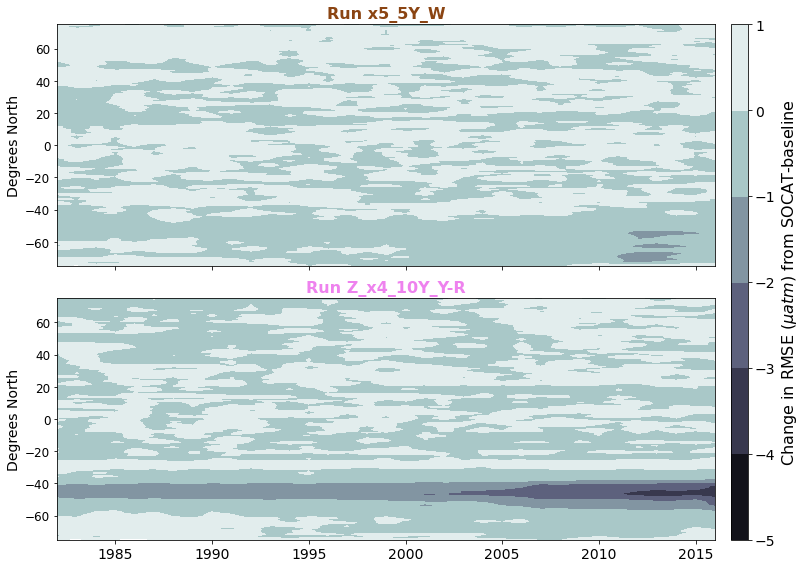

In [21]:
fig, ax = plt.subplots(2,1, figsize=(12,8), sharex=True)

map_plot = ax[0].contourf(range(1982,2017),RMSE_SOCAT_timeline.ylat,(RMSE_sail5_winter_timeline-RMSE_SOCAT_timeline).transpose(),levels=np.linspace(-5,1,7),cmap='bone') 
ax[0].set_ylabel("Degrees North", fontsize=14)
ax[0].set_ylim(-75,75)
ax[0].yaxis.set_tick_params(labelsize=12)
ax[0].set_title('Run x5_5Y_W', fontsize=16, fontweight="bold", color="saddlebrown")

ax[1].contourf(range(1982,2017),RMSE_SOCAT_timeline.ylat,(RMSE_sail_zigzag_10_timeline-RMSE_SOCAT_timeline).transpose(),levels=np.linspace(-5,1,7),cmap='bone')
ax[1].set_ylabel("Degrees North", fontsize=14)
ax[1].set_ylim(-75,75)
ax[1].yaxis.set_tick_params(labelsize=12)
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].set_title('Run Z_x4_10Y_Y-R', fontsize=16, fontweight="bold", color='violet')


plt.tight_layout()

cbar = plt.colorbar(map_plot, aspect=30, orientation='vertical', pad=0.02, ax=ax.ravel().tolist())
cbar.set_label('Change in RMSE ($\mu atm$) from SOCAT-baseline', fontsize=16)
font_size = 14
cbar.ax.tick_params(labelsize=font_size)

fig.savefig("/home/theimdal/Z_x10_5Y_W.jpg",dpi=300, bbox_inches="tight")

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


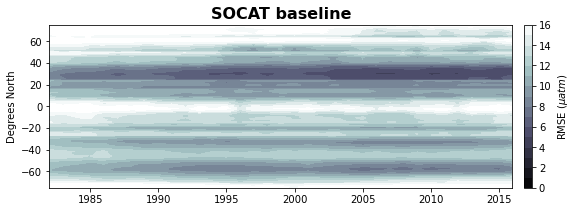

In [31]:
fig = plt.figure(figsize=(10,3))

plt.contourf(range(1982,2017),RMSE_SOCAT_timeline.ylat,(RMSE_SOCAT_timeline).transpose(),levels=np.linspace(0,16,17),cmap='bone')
plt.ylim(-75,75)
plt.ylabel("Degrees North")
plt.title("SOCAT baseline", fontweight='bold', color='black', fontsize=16)

plt.colorbar(label='RMSE ($\mu atm$)', orientation='vertical', pad=0.02)


fig.savefig("/home/theimdal/SOCAT_baseline.jpg",dpi=300, bbox_inches="tight")

## Bias

In [15]:
# Calculate mean bias (globally, 1982-2016) for the different experiments

bias_socat_map = ds_SOCAT_only.diff('status').sel(time=slice("1982-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail5_map = ds_Saildrone_5.diff('status').sel(time=slice("1982-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail5_winter_map = ds_Saildrone_5_5x_winter.diff('status').sel(time=slice("1982-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail10_map = ds_Saildrone_10.diff('status').sel(time=slice("1982-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail10_shifted_map = ds_Saildrone_10_shifted.diff('status').sel(time=slice("1982-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail10_x12_map = ds_Saildrone_10_mult_12.diff('status').sel(time=slice("1982-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail10_x12_winter_map = ds_Saildrone_10_mult_12_winter.diff('status').sel(time=slice("1982-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail_zigzag_10_map = ds_Saildrone_zigzag_10.diff('status').sel(time=slice("1982-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail_zigzag_10_w_map = ds_Saildrone_zigzag_10_winter.diff('status').sel(time=slice("1982-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail_zigzag_5_map = ds_Saildrone_zigzag_5_x12.diff('status').sel(time=slice("1982-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail_zigzag_5_w_map = ds_Saildrone_zigzag_5_x12_winter.diff('status').sel(time=slice("1982-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])

In [16]:
# Calculate change in bias from SOCAT-baseline
map_new_bias_5 = bias_sail5_map-bias_socat_map
map_new_bias_5_winter = bias_sail5_winter_map-bias_socat_map
map_new_bias_10 = bias_sail10_map-bias_socat_map
map_new_bias_10_shifted = bias_sail10_shifted_map-bias_socat_map
map_new_bias_10_12x = bias_sail10_x12_map-bias_socat_map
map_new_bias_10_12x_winter = bias_sail10_x12_winter_map-bias_socat_map
map_new_bias_zigzag_10 = bias_sail_zigzag_10_map-bias_socat_map
map_new_bias_zigzag_10_winter = bias_sail_zigzag_10_w_map-bias_socat_map
map_new_bias_zigzag_5 = bias_sail_zigzag_5_map-bias_socat_map
map_new_bias_zigzag_5_winter = bias_sail_zigzag_5_w_map-bias_socat_map

In [22]:
# Calculate mean bias (globally, 2006/2012-2016) for the different experiments

bias_socat_map_0616 = ds_SOCAT_only.diff('status').sel(time=slice("2006-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_socat_map_1216 = ds_SOCAT_only.diff('status').sel(time=slice("2012-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail5_map_1216 = ds_Saildrone_5.diff('status').sel(time=slice("2012-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail5_winter_map_1216 = ds_Saildrone_5_5x_winter.diff('status').sel(time=slice("2012-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail10_map_0616 = ds_Saildrone_10.diff('status').sel(time=slice("2006-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail10_shifted_map_0616 = ds_Saildrone_10_shifted.diff('status').sel(time=slice("2006-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail10_x12_map_0616 = ds_Saildrone_10_mult_12.diff('status').sel(time=slice("2006-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail10_x12_winter_map_0616 = ds_Saildrone_10_mult_12_winter.diff('status').sel(time=slice("2006-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail_zigzag_10_map_0616 = ds_Saildrone_zigzag_10.diff('status').sel(time=slice("2006-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail_zigzag_10_w_map_0616 = ds_Saildrone_zigzag_10_winter.diff('status').sel(time=slice("2006-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail_zigzag_5_map_1216 = ds_Saildrone_zigzag_5_x12.diff('status').sel(time=slice("2012-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_sail_zigzag_5_w_map_1216 = ds_Saildrone_zigzag_5_x12_winter.diff('status').sel(time=slice("2012-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])

In [23]:
# Calculate change in bias from SOCAT-baseline
map_new_bias_5_1216 = bias_sail5_map_1216-bias_socat_map_1216
map_new_bias_5_winter_1216 = bias_sail5_winter_map_1216-bias_socat_map_1216
map_new_bias_10_0616 = bias_sail10_map_0616-bias_socat_map_0616
map_new_bias_10_shifted_0616 = bias_sail10_shifted_map_0616-bias_socat_map_0616
map_new_bias_10_12x_0616 = bias_sail10_x12_map_0616-bias_socat_map_0616
map_new_bias_10_12x_winter_0616 = bias_sail10_x12_winter_map_0616-bias_socat_map_0616
map_new_bias_zigzag_10_0616 = bias_sail_zigzag_10_map_0616-bias_socat_map_0616
map_new_bias_zigzag_10_winter_0616 = bias_sail_zigzag_10_w_map_0616-bias_socat_map_0616
map_new_bias_zigzag_5_1216 = bias_sail_zigzag_5_map_1216-bias_socat_map_1216
map_new_bias_zigzag_5_winter_1216 = bias_sail_zigzag_5_w_map_1216-bias_socat_map_1216

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
<ipython-input-33-10e7203fd088>:14: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(bias_socat_map, axis=0)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


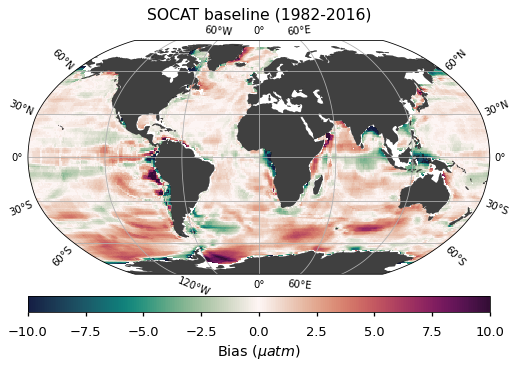

In [33]:
vrange = [-10, 10, 1]
fig_shape = (1,1)
cmap = cm.cm.curl
lab = f'Bias ($\mu atm$)'
   
      
with plt.style.context('seaborn-talk'):
    fig = plt.figure(figsize=(15,5))

    ### Mask
    dia = SpatialMap2(nrows_ncols=fig_shape, fig=fig, cbar_location='bottom', cbar_orientation='horizontal')
    
    
    map_sel = np.nanmean(bias_socat_map, axis=0)
    sub = dia.add_plot(lat = bias_socat_map['ylat'], 
                           lon = bias_socat_map['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=0)
    #print(np.nanmean(np.abs(map_sel.T)))
    dia.set_title("SOCAT baseline (1982-2016)", 0, loc="center")
    
    #dia.grid[0].plot([-180, 180], [35, 35], 'k--', linewidth=2, transform=ccrs.PlateCarree())
    #dia.grid[0].plot([-180, 180], [-35, -35], 'k--',  linewidth=2, transform=ccrs.PlateCarree())
    
    col = dia.add_colorbar(sub)
    dia.set_cbar_xlabel(col, lab)
    
    dia.grid[0].gridlines(draw_labels=True)

fig.savefig("/home/theimdal/Bias_baseline.jpg",dpi=300)

### 1982-2016

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
<ipython-input-29-12745204ab99>:15: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(map_new_bias_5, axis=0)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
<ipython-input-29-12745204ab99>:26: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(map_new_bias_10, axis=0)
<ipython-input-29-12745204ab99>:36: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(map_new_bias_10_sh

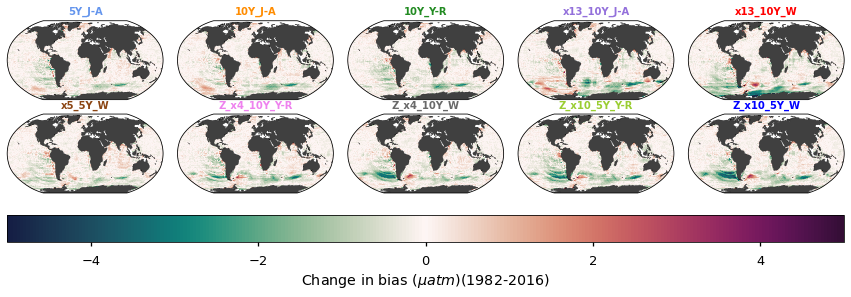

In [29]:
vrange = [-5, 5, 1]
#fig_shape = (1,4)
fig_shape = (2,5)
cmap = cm.cm.curl
lab = f'Change in bias ($\mu atm$)(1982-2016)'
   
      
with plt.style.context('seaborn-talk'):
    fig = plt.figure(figsize=(15,5))

    ### Mask
    dia = SpatialMap2(nrows_ncols=fig_shape, fig=fig, cbar_location='bottom', cbar_orientation='horizontal')
    
    
    map_sel = np.nanmean(map_new_bias_5, axis=0)
    sub = dia.add_plot(lat = map_new_bias_5['ylat'], 
                           lon = map_new_bias_5['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=0)
    dia.set_title("5Y_J-A", 0, loc="center", fontweight='bold', color='cornflowerblue', fontsize=10)
    
    
    map_sel = np.nanmean(map_new_bias_10, axis=0)
    sub = dia.add_plot(lat = map_new_bias_10['ylat'], 
                           lon = map_new_bias_10['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=1)
    dia.set_title("10Y_J-A", 1, loc="center", fontweight='bold', color='darkorange', fontsize=10)
    
    map_sel = np.nanmean(map_new_bias_10_shifted, axis=0)
    sub = dia.add_plot(lat = map_new_bias_10_shifted['ylat'], 
                           lon = map_new_bias_10_shifted['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=2)
    dia.set_title("10Y_Y-R", 2, loc="center", fontweight='bold', color='forestgreen', fontsize=10)
    
    map_sel = np.nanmean(map_new_bias_10_12x, axis=0)
    sub = dia.add_plot(lat = map_new_bias_10_12x['ylat'], 
                           lon = map_new_bias_10_12x['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=3)
    dia.set_title("x13_10Y_J-A", 3, loc="center", fontweight='bold', color='mediumpurple', fontsize=10)
    
    
    map_sel = np.nanmean(map_new_bias_10_12x_winter, axis=0)
    sub = dia.add_plot(lat = map_new_bias_10_12x_winter['ylat'], 
                           lon = map_new_bias_10_12x_winter['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=4)
    dia.set_title("x13_10Y_W", 4, loc="center", fontweight='bold', color='red', fontsize=10)
    
    map_sel = np.nanmean(map_new_bias_5_winter, axis=0)
    sub = dia.add_plot(lat = map_new_bias_5_winter['ylat'], 
                           lon = map_new_bias_5_winter['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=5)
    dia.set_title("x5_5Y_W", 5, loc="center", fontweight='bold', color='saddlebrown', fontsize=10)
    
    
    map_sel = np.nanmean(map_new_bias_zigzag_10, axis=0)
    sub = dia.add_plot(lat = map_new_bias_zigzag_10['ylat'], 
                           lon = map_new_bias_zigzag_10['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=6)
    dia.set_title("Z_x4_10Y_Y-R", 6, loc="center", fontweight='bold', color='violet', fontsize=10)
    
    map_sel = np.nanmean(map_new_bias_zigzag_10_winter, axis=0)
    sub = dia.add_plot(lat = map_new_bias_zigzag_10_winter['ylat'], 
                           lon = map_new_bias_zigzag_10_winter['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=7)
    dia.set_title("Z_x4_10Y_W", 7, loc="center", fontweight='bold', color='dimgray', fontsize=10)
    
    map_sel = np.nanmean(map_new_bias_zigzag_5, axis=0)
    sub = dia.add_plot(lat = map_new_bias_zigzag_5['ylat'], 
                           lon = map_new_bias_zigzag_5['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=8)
    dia.set_title("Z_x10_5Y_Y-R", 8, loc="center", fontweight='bold', color='yellowgreen', fontsize=10)
    
    map_sel = np.nanmean(map_new_bias_zigzag_5_winter, axis=0)
    sub = dia.add_plot(lat = map_new_bias_zigzag_5_winter['ylat'], 
                           lon = map_new_bias_zigzag_5_winter['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=9)
    dia.set_title("Z_x10_5Y_W", 9, loc="center", fontweight='bold', color='blue', fontsize=10)
    
    
    col = dia.add_colorbar(sub)
    dia.set_cbar_xlabel(col, lab)
    #dia.grid[0].gridlines(draw_labels=True)

fig.savefig("/home/theimdal/bias_maps_1982-2016.jpg",dpi=300)

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
<ipython-input-27-60e2053f2922>:15: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(map_new_bias_5_winter, axis=0)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
<ipython-input-27-60e2053f2922>:25: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(map_new_bias_zigzag_10, axis=0)


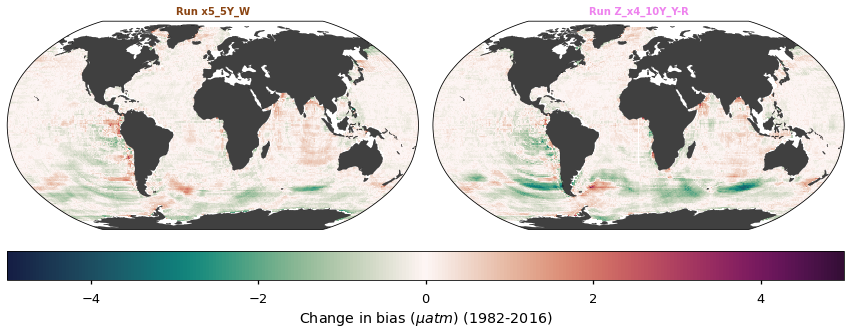

In [27]:
vrange = [-5, 5, 1]
#fig_shape = (1,4)
fig_shape = (1,2)
cmap = cm.cm.curl
lab = f'Change in bias ($\mu atm$) (1982-2016)'
   
      
with plt.style.context('seaborn-talk'):
    fig = plt.figure(figsize=(15,5))

    ### Mask
    dia = SpatialMap2(nrows_ncols=fig_shape, fig=fig, cbar_location='bottom', cbar_orientation='horizontal')

    
    map_sel = np.nanmean(map_new_bias_5_winter, axis=0)
    sub = dia.add_plot(lat = map_new_bias_5_winter['ylat'], 
                           lon = map_new_bias_5_winter['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=0)
    dia.set_title("Run x5_5Y_W", 0, loc="center", fontweight='bold', color='saddlebrown', fontsize=10)
    
    map_sel = np.nanmean(map_new_bias_zigzag_10, axis=0)
    sub = dia.add_plot(lat = map_new_bias_zigzag_10['ylat'], 
                           lon = map_new_bias_zigzag_10['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=1)
    dia.set_title("Run Z_x4_10Y_Y-R", 1, loc="center", fontweight='bold', color='violet', fontsize=10)
    
    
    col = dia.add_colorbar(sub)
    dia.set_cbar_xlabel(col, lab)
    #dia.grid[0].gridlines(draw_labels=True)

fig.savefig("/home/theimdal/bias_maps_1982-2016_main_text.jpg",dpi=300)

### 2006/2012-2016

In [ ]:
vrange = [-5, 5, 1]
#fig_shape = (1,4)
fig_shape = (2,5)
cmap = cm.cm.curl
lab = f'Change in bias ($\mu atm$)(2006/2012-2016)'
   
      
with plt.style.context('seaborn-talk'):
    fig = plt.figure(figsize=(15,5))

    ### Mask
    dia = SpatialMap2(nrows_ncols=fig_shape, fig=fig, cbar_location='bottom', cbar_orientation='horizontal')
    
    
    map_sel = np.nanmean(map_new_bias_5_1216, axis=0)
    sub = dia.add_plot(lat = map_new_bias_5_1216['ylat'], 
                           lon = map_new_bias_5_1216['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=0)
    dia.set_title("5Y_J-A", 0, loc="center", fontweight='bold', color='cornflowerblue', fontsize=10)
    
    
    map_sel = np.nanmean(map_new_bias_10_0616, axis=0)
    sub = dia.add_plot(lat = map_new_bias_10_0616['ylat'], 
                           lon = map_new_bias_10_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=1)
    dia.set_title("10Y_J-A", 1, loc="center", fontweight='bold', color='darkorange', fontsize=10)
    
    map_sel = np.nanmean(map_new_bias_10_shifted_0616, axis=0)
    sub = dia.add_plot(lat = map_new_bias_10_shifted_0616['ylat'], 
                           lon = map_new_bias_10_shifted_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=2)
    dia.set_title("10Y_YR", 2, loc="center", fontweight='bold', color='forestgreen', fontsize=10)
    
    map_sel = np.nanmean(map_new_bias_10_12x_0616, axis=0)
    sub = dia.add_plot(lat = map_new_bias_10_12x_0616['ylat'], 
                           lon = map_new_bias_10_12x_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=3)
    dia.set_title("x13_10Y_J-A", 3, loc="center", fontweight='bold', color='mediumpurple', fontsize=10)
    
    
    map_sel = np.nanmean(map_new_bias_10_12x_winter_0616, axis=0)
    sub = dia.add_plot(lat = map_new_bias_10_12x_winter_0616['ylat'], 
                           lon = map_new_bias_10_12x_winter_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=4)
    dia.set_title("x13_10Y_W", 4, loc="center", fontweight='bold', color='red', fontsize=10)
    
    map_sel = np.nanmean(map_new_bias_5_winter_1216, axis=0)
    sub = dia.add_plot(lat = map_new_bias_5_winter_1216['ylat'], 
                           lon = map_new_bias_5_winter_1216['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=5)
    dia.set_title("x5_5Y_W", 5, loc="center", fontweight='bold', color='saddlebrown', fontsize=10)
    
    
    map_sel = np.nanmean(map_new_bias_zigzag_10_0616, axis=0)
    sub = dia.add_plot(lat = map_new_bias_zigzag_10_0616['ylat'], 
                           lon = map_new_bias_zigzag_10_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=6)
    dia.set_title("Z_x4_10Y_YR", 6, loc="center", fontweight='bold', color='violet', fontsize=10)
    
    map_sel = np.nanmean(map_new_bias_zigzag_10_winter_0616, axis=0)
    sub = dia.add_plot(lat = map_new_bias_zigzag_10_winter_0616['ylat'], 
                           lon = map_new_bias_zigzag_10_winter_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=7)
    dia.set_title("Z_x4_10Y_W", 7, loc="center", fontweight='bold', color='dimgray', fontsize=10)
    
    map_sel = np.nanmean(map_new_bias_zigzag_5_1216, axis=0)
    sub = dia.add_plot(lat = map_new_bias_zigzag_5_1216['ylat'], 
                           lon = map_new_bias_zigzag_5_1216['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=8)
    dia.set_title("Z_x10_5Y_YR", 8, loc="center", fontweight='bold', color='yellowgreen', fontsize=10)
    
    map_sel = np.nanmean(map_new_bias_zigzag_5_winter_1216, axis=0)
    sub = dia.add_plot(lat = map_new_bias_zigzag_5_winter_1216['ylat'], 
                           lon = map_new_bias_zigzag_5_winter_1216['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=9)
    dia.set_title("Z_x10_5Y_W", 9, loc="center", fontweight='bold', color='blue', fontsize=10)
    
    
    col = dia.add_colorbar(sub)
    dia.set_cbar_xlabel(col, lab)
    #dia.grid[0].gridlines(draw_labels=True)

fig.savefig("/home/theimdal/bias_maps_2006-2016.jpg",dpi=300)

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
<ipython-input-30-9c72f4d82a5d>:15: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(map_new_bias_5_0616, axis=0)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
<ipython-input-30-9c72f4d82a5d>:26: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(map_new_bias_10_0616, axis=0)
<ipython-input-30-9c72f4d82a5d>:36: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(map_new_

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
<ipython-input-26-3183e133dfa0>:15: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(map_new_bias_5_winter, axis=0)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
<ipython-input-26-3183e133dfa0>:25: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(map_new_bias_zigzag_10, axis=0)
<ipython-input-26-3183e133dfa0>:36: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(map_

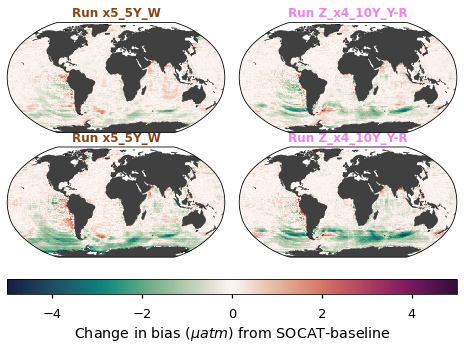

In [26]:
vrange = [-5, 5, 1]
#fig_shape = (1,4)
fig_shape = (2,2)
cmap = cm.cm.curl
lab = f'Change in bias ($\mu atm$) from SOCAT-baseline'
   
      
with plt.style.context('seaborn-talk'):
    fig = plt.figure(figsize=(15,5))

    ### Mask
    dia = SpatialMap2(nrows_ncols=fig_shape, fig=fig, cbar_location='bottom', cbar_orientation='horizontal')
    
    
    map_sel = np.nanmean(map_new_bias_5_winter, axis=0)
    sub = dia.add_plot(lat = map_new_bias_5_winter['ylat'], 
                           lon = map_new_bias_5_winter['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=0)
    dia.set_title("Run x5_5Y_W", 0, loc="center", fontweight='bold', color='saddlebrown', fontsize=12)
    
    map_sel = np.nanmean(map_new_bias_zigzag_10, axis=0)
    sub = dia.add_plot(lat = map_new_bias_zigzag_10['ylat'], 
                           lon = map_new_bias_zigzag_10['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=1)
    dia.set_title("Run Z_x4_10Y_Y-R", 1, loc="center", fontweight='bold', color='violet', fontsize=12)
    
    
    map_sel = np.nanmean(map_new_bias_5_winter_1216, axis=0)
    sub = dia.add_plot(lat = map_new_bias_5_winter_1216['ylat'], 
                           lon = map_new_bias_5_winter_1216['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=2)
    dia.set_title("Run x5_5Y_W", 2, loc="center", fontweight='bold', color='saddlebrown', fontsize=12)
    
    map_sel = np.nanmean(map_new_bias_zigzag_10_0616, axis=0)
    sub = dia.add_plot(lat = map_new_bias_zigzag_10_0616['ylat'], 
                           lon = map_new_bias_zigzag_10_0616['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=3)
    dia.set_title("Run Z_x4_10Y_Y-R", 3, loc="center", fontweight='bold', color='violet', fontsize=12)
    
    
    col = dia.add_colorbar(sub)
    dia.set_cbar_xlabel(col, lab)
    #dia.grid[0].gridlines(draw_labels=True)

fig.savefig("/home/theimdal/bias_maps_main_text.jpg",dpi=300, bbox_inches="tight")

### Hovmoller plots

In [27]:
# Calculate global bias 1982-2016
timeline_SOCAT = ds_SOCAT_only.diff('status').sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status'])
timeline_Sail5 = ds_Saildrone_5.diff('status').sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status'])
timeline_Sail5_winter = ds_Saildrone_5_5x_winter.diff('status').sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status'])
timeline_Sail10 = ds_Saildrone_10.diff('status').sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status'])
timeline_Sail10_shifted = ds_Saildrone_10_shifted.diff('status').sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status'])
timeline_Sail10_mult_12 = ds_Saildrone_10_mult_12.diff('status').sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status'])
timeline_Sail10_mult_12_winter = ds_Saildrone_10_mult_12_winter.diff('status').sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status'])
timeline_Sail_zigzag_10 = ds_Saildrone_zigzag_10.diff('status').sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status'])
timeline_Sail_zigzag_10_winter = ds_Saildrone_zigzag_10_winter.diff('status').sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status'])
timeline_Sail_zigzag_5 = ds_Saildrone_zigzag_5_x12.diff('status').sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status'])
timeline_Sail_zigzag_5_winter = ds_Saildrone_zigzag_5_x12_winter.diff('status').sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status'])

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


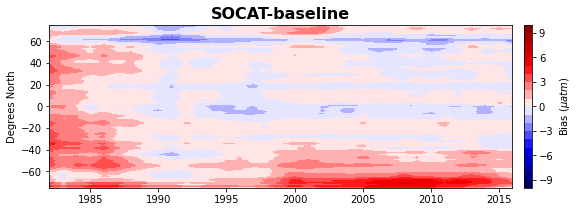

In [28]:
fig = plt.figure(figsize=(10,3))

plt.contourf(range(1982,2017),timeline_SOCAT.ylat,(timeline_SOCAT).transpose(),levels=np.linspace(-10,10,21),cmap='seismic')
plt.ylim(-75,75)
plt.ylabel("Degrees North")
plt.title("SOCAT-baseline", fontweight='bold', color='black', fontsize=16)

plt.colorbar(label='Bias ($\mu atm$)', orientation='vertical', pad=0.02)


fig.savefig("/home/theimdal/SOCAT_baseline_bias_map.jpg",dpi=300, bbox_inches="tight")

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


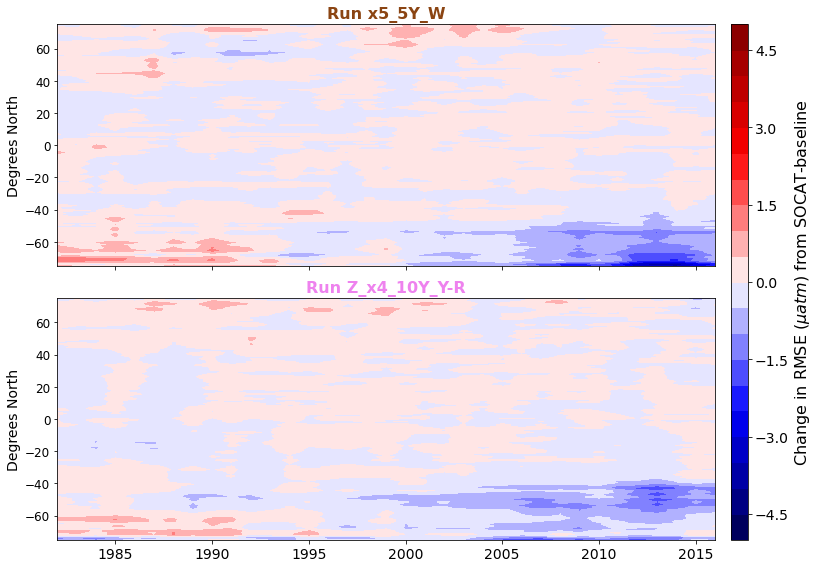

In [30]:
fig, ax = plt.subplots(2,1, figsize=(12,8), sharex=True)

map_plot = ax[0].contourf(range(1982,2017),timeline_SOCAT.ylat,(timeline_Sail5_winter-timeline_SOCAT).transpose(),levels=np.linspace(-5,5,21),cmap='seismic') 
ax[0].set_ylabel("Degrees North", fontsize=14)
ax[0].set_ylim(-75,75)
ax[0].yaxis.set_tick_params(labelsize=12)
ax[0].set_title('Run x5_5Y_W', fontsize=16, fontweight="bold", color="saddlebrown")

ax[1].contourf(range(1982,2017),timeline_SOCAT.ylat,(timeline_Sail_zigzag_10-timeline_SOCAT).transpose(),levels=np.linspace(-5,5,21),cmap='seismic')
ax[1].set_ylabel("Degrees North", fontsize=14)
ax[1].set_ylim(-75,75)
ax[1].yaxis.set_tick_params(labelsize=12)
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].set_title('Run Z_x4_10Y_Y-R', fontsize=16, fontweight="bold", color='violet')


plt.tight_layout()

cbar = plt.colorbar(map_plot, aspect=30, orientation='vertical', pad=0.02, ax=ax.ravel().tolist())
cbar.set_label('Change in RMSE ($\mu atm$) from SOCAT-baseline', fontsize=16)
font_size = 14
cbar.ax.tick_params(labelsize=font_size)

fig.savefig("/home/theimdal/bias_Z_x10_5Y_W.jpg",dpi=300, bbox_inches="tight")

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.p

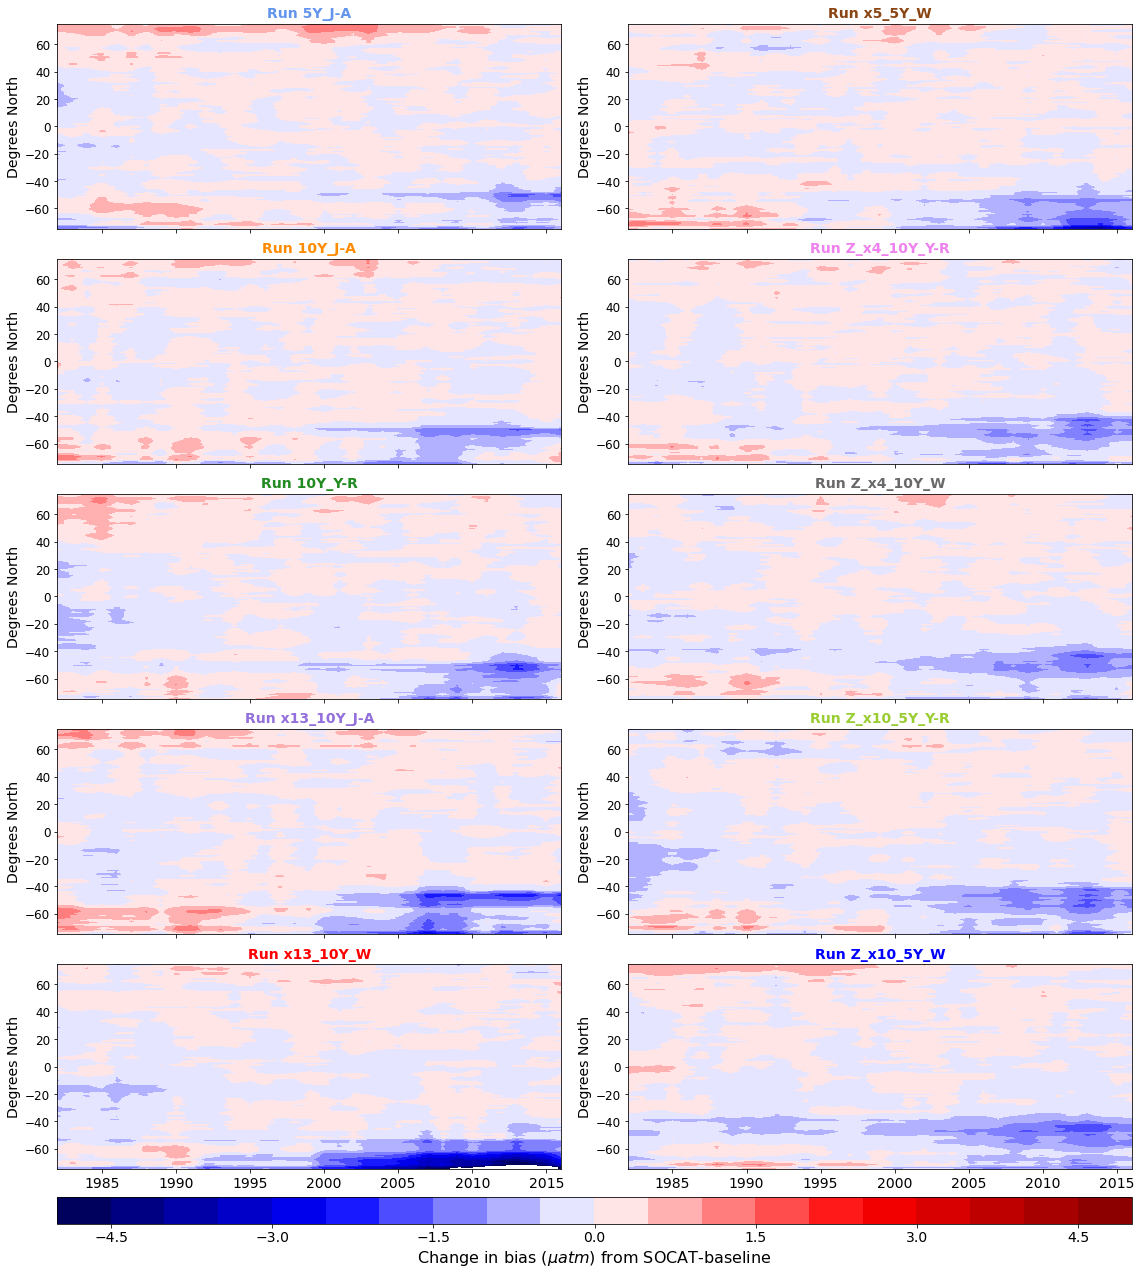

In [32]:
fig, ax = plt.subplots(5,2, figsize=(16,20), sharex=True)

map_plot = ax[0,0].contourf(range(1982,2017),timeline_SOCAT.ylat,(timeline_Sail5-timeline_SOCAT).transpose(),levels=np.linspace(-5,5,21),cmap='seismic') #levels, cmap and extend are optional
ax[0,0].set_ylabel("Degrees North", fontsize=14)
ax[0,0].set_ylim(-75,75)
ax[0,0].yaxis.set_tick_params(labelsize=12)
ax[0,0].set_title('Run 5Y_J-A', fontsize=14, fontweight="bold", color="cornflowerblue")

ax[1,0].contourf(range(1982,2017),timeline_SOCAT.ylat,(timeline_Sail10-timeline_SOCAT).transpose(),levels=np.linspace(-5,5,21),cmap='seismic')
ax[1,0].set_ylabel("Degrees North", fontsize=14)
ax[1,0].set_ylim(-75,75)
ax[1,0].yaxis.set_tick_params(labelsize=12)
ax[1,0].set_title('Run 10Y_J-A', fontsize=14, fontweight="bold", color="darkorange")

ax[2,0].contourf(range(1982,2017),timeline_SOCAT.ylat,(timeline_Sail10_shifted-timeline_SOCAT).transpose(),levels=np.linspace(-5,5,21),cmap='seismic')
ax[2,0].set_ylabel("Degrees North", fontsize=14)
ax[2,0].set_ylim(-75,75)
ax[2,0].yaxis.set_tick_params(labelsize=12)
ax[2,0].set_title('Run 10Y_Y-R', fontsize=14, fontweight="bold", color="forestgreen")

ax[3,0].contourf(range(1982,2017),timeline_SOCAT.ylat,(timeline_Sail10_mult_12-timeline_SOCAT).transpose(),levels=np.linspace(-5,5,21),cmap='seismic')
ax[3,0].set_ylabel("Degrees North", fontsize=14)
ax[3,0].set_ylim(-75,75)
ax[3,0].yaxis.set_tick_params(labelsize=12)
ax[3,0].set_title('Run x13_10Y_J-A', fontsize=14, fontweight="bold", color="mediumpurple")

ax[4,0].contourf(range(1982,2017),timeline_SOCAT.ylat,(timeline_Sail10_mult_12_winter-timeline_SOCAT).transpose(),levels=np.linspace(-5,5,21),cmap='seismic')
ax[4,0].set_ylabel("Degrees North", fontsize=14)
ax[4,0].set_ylim(-75,75)
ax[4,0].yaxis.set_tick_params(labelsize=12)
ax[4,0].xaxis.set_tick_params(labelsize=14)
ax[4,0].set_title('Run x13_10Y_W', fontsize=14, fontweight="bold", color="red")

ax[0,1].contourf(range(1982,2017),timeline_SOCAT.ylat,(timeline_Sail5_winter-timeline_SOCAT).transpose(),levels=np.linspace(-5,5,21),cmap='seismic')
ax[0,1].set_ylabel("Degrees North", fontsize=14)
ax[0,1].set_ylim(-75,75)
ax[0,1].yaxis.set_tick_params(labelsize=12)
ax[0,1].set_title('Run x5_5Y_W', fontsize=14, fontweight="bold", color="saddlebrown")

ax[1,1].contourf(range(1982,2017),timeline_SOCAT.ylat,(timeline_Sail_zigzag_10-timeline_SOCAT).transpose(),levels=np.linspace(-5,5,21),cmap='seismic')
ax[1,1].set_ylabel("Degrees North", fontsize=14)
ax[1,1].set_ylim(-75,75)
ax[1,1].yaxis.set_tick_params(labelsize=12)
ax[1,1].set_title('Run Z_x4_10Y_Y-R', fontsize=14, fontweight="bold", color="violet")

ax[2,1].contourf(range(1982,2017),timeline_SOCAT.ylat,(timeline_Sail_zigzag_10_winter-timeline_SOCAT).transpose(),levels=np.linspace(-5,5,21),cmap='seismic')
ax[2,1].set_ylabel("Degrees North", fontsize=14)
ax[2,1].set_ylim(-75,75)
ax[2,1].yaxis.set_tick_params(labelsize=12)
ax[2,1].set_title('Run Z_x4_10Y_W', fontsize=14, fontweight="bold", color="dimgray")

ax[3,1].contourf(range(1982,2017),timeline_SOCAT.ylat,(timeline_Sail_zigzag_5-timeline_SOCAT).transpose(),levels=np.linspace(-5,5,21),cmap='seismic')
ax[3,1].set_ylabel("Degrees North", fontsize=14)
ax[3,1].set_ylim(-75,75)
ax[3,1].yaxis.set_tick_params(labelsize=12)
ax[3,1].set_title('Run Z_x10_5Y_Y-R', fontsize=14, fontweight="bold", color="yellowgreen")

ax[4,1].contourf(range(1982,2017),timeline_SOCAT.ylat,(timeline_Sail_zigzag_5_winter-timeline_SOCAT).transpose(),levels=np.linspace(-5,5,21),cmap='seismic')
ax[4,1].set_ylabel("Degrees North", fontsize=14)
ax[4,1].set_ylim(-75,75)
ax[4,1].yaxis.set_tick_params(labelsize=12)
ax[4,1].xaxis.set_tick_params(labelsize=14)
ax[4,1].set_title('Run Z_x10_5Y_W', fontsize=14, fontweight="bold", color="blue")

plt.tight_layout()

cbar = plt.colorbar(map_plot, aspect=40, orientation='horizontal', pad=0.02, ax=ax.ravel().tolist())
cbar.set_label('Change in bias ($\mu atm$) from SOCAT-baseline', fontsize=16)
font_size = 14
cbar.ax.tick_params(labelsize=font_size)

fig.savefig("/home/theimdal/bias_timelines_maps_SI.jpg",dpi=300, bbox_inches="tight")